In [3]:
#!pip install scikit-learn --upgrade

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [5]:
url = 'https://drive.google.com/file/d/1WN_JAZVHmpi_KMk4Zgyv7S3G3BekEn82/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
cat_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cat_ordinal:
    data[col] = data[col].astype('category')

In [8]:
X = data.copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

In [9]:
data.corrwith(data['SalePrice']).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

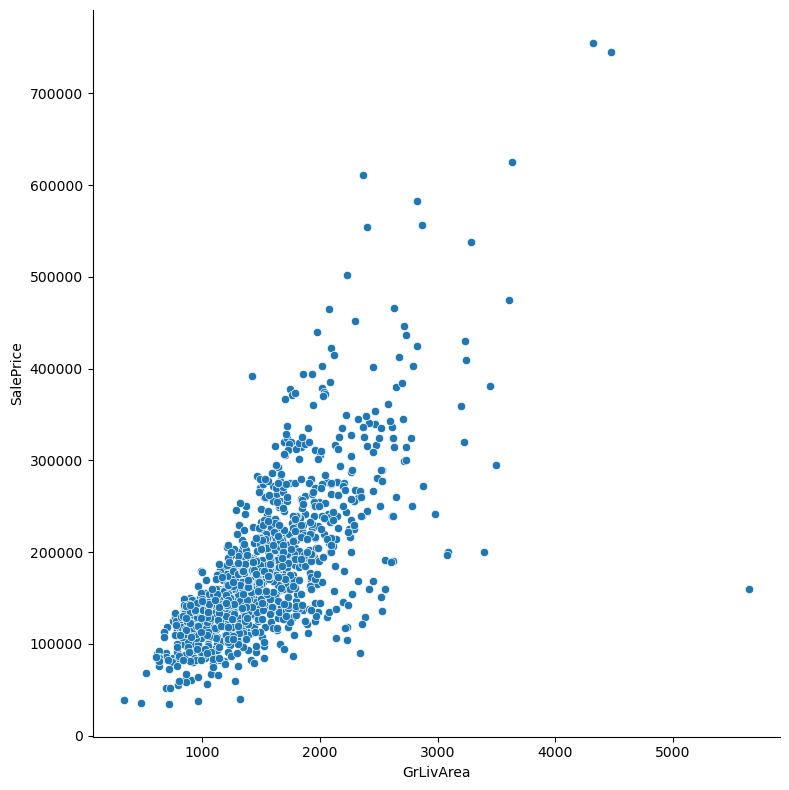

In [10]:
sns.relplot(x=X_train['GrLivArea'],y=y_train,height=8)

In [11]:
# GrLivArea * 120

dummy_model_predictions = X_test['GrLivArea'] *120
dummy_model_predictions

1260    201000
274      97920
51      141120
117     135000
789     250440
         ...  
801     143520
1292    284640
197     373440
780     150360
360     109440
Name: GrLivArea, Length: 292, dtype: int64

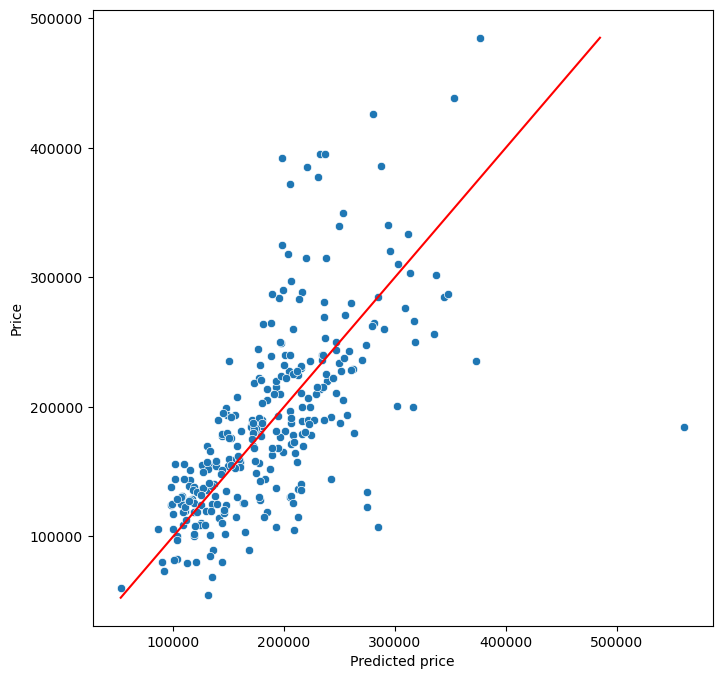

In [12]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Price')
    plt.xlabel('Predicted price')
    plt.show()

plot_predictions(y_test, dummy_model_predictions)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

dummy_mae = mean_absolute_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_rmse = mean_squared_error(y_true = y_test, y_pred = dummy_model_predictions, squared=False)
dummy_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_r2 = r2_score(y_true = y_test, y_pred = dummy_model_predictions)

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [16]:
#[qualities]*len(make_column_selector(dtype_include='category')(X_train))

In [17]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [19]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [20]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002D26552DEB0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='None',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['None',
                                                                              'TA',
                                                                              'Po',
                                                                              'F...
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002D26552DD30>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NaN',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002D26B6D20D0>)])

In [31]:


dt_pipeline = make_pipeline(
                            preprocessor, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb520>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [32]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb520>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [33]:
dt_predictions = dt_pipeline.predict(X_test)

In [34]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [35]:
pd.DataFrame({"MAE": [dummy_mae, dt_mae],
              "RMSE": [dummy_rmse, dt_rmse],
              "MAPE": [dummy_mape, dt_mape],
              "R2": [dummy_r2, dt_r2]},
             index=["dummy_model", "decision_tree"])

,MAE,RMSE,MAPE,R2
dummy_model,38588.380137,56174.560087,0.218908,0.400337
decision_tree,27988.893836,46512.140474,0.151541,0.588887


## Add feature selection and change model

In [17]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [ ]:
#[qualities]*len(make_column_selector(dtype_include='category')(X_train))

In [18]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [19]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

selectfeatures = SelectFromModel(DecisionTreeRegressor())

In [38]:
scaler = StandardScaler()

In [46]:


dt2_pipeline = make_pipeline(
                            preprocessor,
                            selectfeatures, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt2_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [47]:
dt2_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecb370>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3aa4ecbdc0>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [49]:
dt2_predictions = dt2_pipeline.predict(X_test)

In [50]:
dt2_mae = mean_absolute_error(y_true = y_test, y_pred = dt2_predictions)
dt2_rmse = mean_squared_error(y_true = y_test, y_pred = dt2_predictions, squared=False)
dt2_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt2_predictions)
dt2_r2 = r2_score(y_true = y_test, y_pred = dt2_predictions)

In [52]:
scoring = pd.DataFrame({"MAE": [dt_mae, dt2_mae],
              "RMSE": [dt_rmse, dt2_rmse],
              "MAPE": [dt_mape, dt2_mape],
              "R2": [dt_r2, dt2_r2]},
             index=["dt_model", "dt2_tree"])
scoring

,MAE,RMSE,MAPE,R2
dt_model,27988.893836,46512.140474,0.151541,0.588887
dt2_tree,25617.640411,43248.615722,0.138912,0.644555
